In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 

In [ ]:
car_sales = pd.read_csv("data/car-sales.csv")

car_sales

In [ ]:
X = car_sales.drop("Price", axis=1)
Y = car_sales["Price"]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_columns)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)

transformed_X

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(42) 

model = GradientBoostingRegressor()

model.fit(X_train, Y_train)

model.score(X_test, Y_test)

In [ ]:
heart_disease = pd.read_csv("data/heart-disease.csv")

heart_disease

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, Y_train)

single_score = model.score(X_test, Y_test)

# multi_cross_val_score = np.mean(cross_val_score(model, X, Y))

# single_score, multi_cross_val_score

# y_preds = model.predict_proba(X_test)

# y_positives = y_preds[:, 1]

# fpr, tpr, threshold = roc_curve(Y_test, y_positives)

y_preds = model.predict(X_test)

confusion_matric = confusion_matrix(Y_test, y_preds)

confusion_matric

ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=Y)

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_preds)

In [ ]:
pd.crosstab(Y_test, y_preds,
            rownames=["Actual Labels"],
            colnames=["Predictive Labels"])


In [ ]:
import seaborn as sns

sns.set_theme(font_scale=1.5)
sns.heatmap(confusion_matric)

In [ ]:
from sklearn.metrics import classification_report


class_report = classification_report(Y_test, y_preds)
print(class_report)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

def get_preds(y_test, y_preds):

    accuracy_predictions = accuracy_score(y_test, y_preds)
    precision_predictions = precision_score(y_test, y_preds)
    recall_predictions = recall_score(y_test, y_preds)
    f1_predictions = f1_score(y_test, y_preds)

    metric_dict = {"accuracy": accuracy_predictions,
                     "precision": precision_predictions,
                     "recall": recall_predictions,
                     "f1": f1_predictions}
    
    print(f"Accuracy: {accuracy_predictions * 100:.2f}%")
    print(f"Precision: {precision_predictions:.2f}")
    print(f"Recall: {recall_predictions:.2f}")
    print(f"F1: {f1_predictions:.2f}")

    return metric_dict

In [100]:
np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = get_preds(y_valid, y_preds)

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


In [124]:
np.random.seed(42)

clf_2 = RandomForestClassifier(n_estimators=10000)

clf_2.fit(X_train, y_train)

y_preds_2 = clf_2.predict(X_test)

clf2_metrics = get_preds(y_test, y_preds_2)

Accuracy: 80.33%
Precision: 0.84
Recall: 0.79
F1: 0.81


In [112]:
clf_2.score(X_valid, y_valid)

0.9555555555555556

In [ ]:
clf.get_params()

In [101]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
        "n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["log2", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]
    }

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=-1)

rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=10, cv=5, verbose=2)

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; tot

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [102]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 20}

In [108]:
y_preds = rs_clf.predict(X_test)

rs_clf_metrics = get_preds(y_test, y_preds)

Accuracy: 81.97%
Precision: 0.84
Recall: 0.82
F1: 0.83


In [104]:
from sklearn.model_selection import GridSearchCV

grid_2 = {
        "n_estimators": [100, 200, 500],
        "max_depth": [None],
        "max_features": ["log2", "sqrt"],
        "min_samples_split": [2],
        "min_samples_leaf": [2, 4]
    }

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=-1)

gs_clf = GridSearchCV(estimator=clf, param_grid=grid_2, cv=5, verbose=2)

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, 

In [105]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [106]:
y_preds = gs_clf.predict(X_test)

gs_clf_metrics = get_preds(y_test, y_preds)

Accuracy: 81.97%
Precision: 0.84
Recall: 0.82
F1: 0.83


<Axes: >

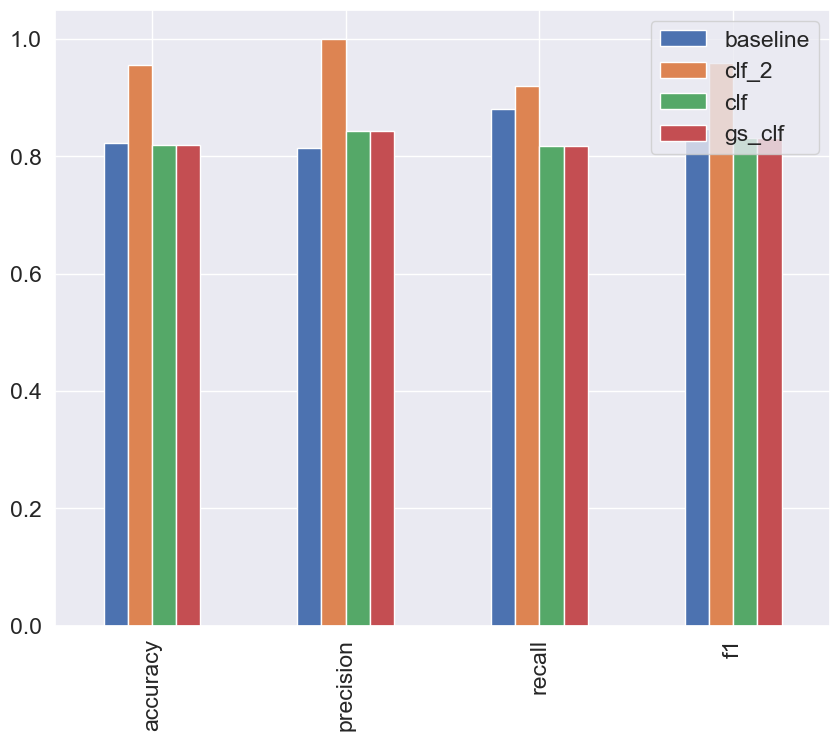

In [111]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf2_metrics,
                                "clf": rs_clf_metrics,
                                "gs_clf": gs_clf_metrics})

compare_metrics.plot.bar(figsize=(10, 8))

In [119]:
import pickle

pickle.dump(gs_clf, open("gs_clf.pkl", "wb"))

In [120]:
loaded_clf_2_model = pickle.load(open("gs_clf.pkl", "rb"))

In [121]:
np.random.seed(42)

y_preds = loaded_clf_2_model.predict(X_test)

get_preds(y_test, y_preds)

Accuracy: 81.97%
Precision: 0.84
Recall: 0.82
F1: 0.83


{'accuracy': 0.819672131147541,
 'precision': 0.84375,
 'recall': 0.8181818181818182,
 'f1': 0.8307692307692308}

In [122]:
from joblib import dump, load

dump(gs_clf, "gs_clf.joblib")

['gs_clf.joblib']

In [123]:
joblib_gs_clf = load("gs_clf.joblib")

y_preds = joblib_gs_clf.predict(X_test)

get_preds(y_test, y_preds)

Accuracy: 81.97%
Precision: 0.84
Recall: 0.82
F1: 0.83


{'accuracy': 0.819672131147541,
 'precision': 0.84375,
 'recall': 0.8181818181818182,
 'f1': 0.8307692307692308}